In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import scipy as sp
import torch

In [14]:
# Specify the file path
file_path_vid = "all_valididx.pickle"
file_path_tid = "all_trainidx.pickle"
file_path_pred = "pred.pickle"
file_path_tEtar = "trueE_target.pickle"

In [10]:
# Open the file and load its content
with open(file_path_pred, "rb") as file:  # "rb" mode is for reading in binary
    data_pred = pickle.load(file)

In [11]:
type(data_pred)

list

In [12]:
len(data_pred)

1042342

In [32]:
data_pred

[1.5356664657592773,
 0.738716185092926,
 1.5493919849395752,
 0.5361227989196777,
 0.7976766228675842,
 0.5033293962478638,
 0.8502689003944397,
 1.5883491039276123,
 0.7594645619392395,
 0.5454940795898438,
 0.855116605758667,
 0.8390073180198669,
 0.7434696555137634,
 0.6650449633598328,
 0.870603084564209,
 0.9245606064796448,
 1.030778169631958,
 0.9351794123649597,
 1.1163604259490967,
 1.0900781154632568,
 0.8859015107154846,
 0.8618550896644592,
 0.8721257448196411,
 0.6095827221870422,
 1.2815277576446533,
 0.7277757525444031,
 0.632171094417572,
 0.587688684463501,
 0.9779828190803528,
 0.9074729084968567,
 1.743497371673584,
 1.0110068321228027,
 0.8653948903083801,
 1.075469732284546,
 0.4162534177303314,
 1.451869010925293,
 1.9662890434265137,
 0.8368977904319763,
 0.803156316280365,
 1.0477849245071411,
 1.497399091720581,
 1.8491249084472656,
 1.3198952674865723,
 0.6978908181190491,
 1.0041191577911377,
 1.0803980827331543,
 0.9583044648170471,
 1.580247163772583,
 0.6

In [15]:
# Open the file and load its content
with open(file_path_tEtar, "rb") as file:  # "rb" mode is for reading in binary
    data_true = pickle.load(file)

In [18]:
type(data_true)

awkward.highlevel.Array

In [26]:
data_true_list = data_true.to_list()

In [27]:
type(data_true_list)

list

In [31]:
len(data_true_list)

1042342

In [30]:
data_true_list

[[1.958823323249817],
 [0.866931676864624],
 [1.7783476114273071],
 [1.1661255359649658],
 [0.5498670339584351],
 [0.6740662455558777],
 [1.0973424911499023],
 [1.703155279159546],
 [0.3215644061565399],
 [0.3802453577518463],
 [0.7763238549232483],
 [0.23758180439472198],
 [0.7765997648239136],
 [0.7829447388648987],
 [0.18814906477928162],
 [0.8029715418815613],
 [0.7563693523406982],
 [0.8948090076446533],
 [1.2764075994491577],
 [1.307634949684143],
 [0.8913171887397766],
 [1.2619202136993408],
 [0.7290141582489014],
 [1.7920351028442383],
 [1.7394627332687378],
 [0.52597576379776],
 [0.5938244462013245],
 [1.3753308057785034],
 [0.27704745531082153],
 [1.6474840641021729],
 [1.3797508478164673],
 [1.5065581798553467],
 [0.3601802885532379],
 [0.5382128953933716],
 [0.12472610175609589],
 [1.527424693107605],
 [1.9248322248458862],
 [0.25894853472709656],
 [0.533145546913147],
 [0.9589473605155945],
 [1.6069415807724],
 [1.9484282732009888],
 [1.536880612373352],
 [0.79754596948623

In [35]:
# Original list with extra brackets
nested_list = data_true_list

# Flatten the list to remove extra brackets
simple_list = [x[0] for x in nested_list]

Data_true_list = simple_list



In [36]:
Data_true_list

[1.958823323249817,
 0.866931676864624,
 1.7783476114273071,
 1.1661255359649658,
 0.5498670339584351,
 0.6740662455558777,
 1.0973424911499023,
 1.703155279159546,
 0.3215644061565399,
 0.3802453577518463,
 0.7763238549232483,
 0.23758180439472198,
 0.7765997648239136,
 0.7829447388648987,
 0.18814906477928162,
 0.8029715418815613,
 0.7563693523406982,
 0.8948090076446533,
 1.2764075994491577,
 1.307634949684143,
 0.8913171887397766,
 1.2619202136993408,
 0.7290141582489014,
 1.7920351028442383,
 1.7394627332687378,
 0.52597576379776,
 0.5938244462013245,
 1.3753308057785034,
 0.27704745531082153,
 1.6474840641021729,
 1.3797508478164673,
 1.5065581798553467,
 0.3601802885532379,
 0.5382128953933716,
 0.12472610175609589,
 1.527424693107605,
 1.9248322248458862,
 0.25894853472709656,
 0.533145546913147,
 0.9589473605155945,
 1.6069415807724,
 1.9484282732009888,
 1.536880612373352,
 0.7975459694862366,
 0.6858358979225159,
 0.8192192912101746,
 1.6380994319915771,
 1.9706631898880005,

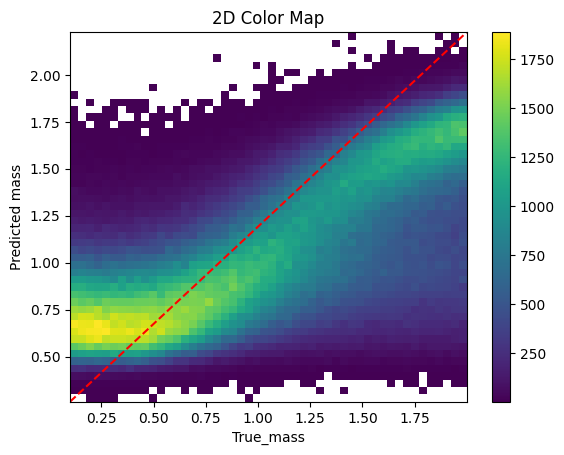

In [47]:
# Reshape into a 2D array (just for demonstration)
data = np.array([data_pred, Data_true_list])

x = np.linspace (min(Data_true_list), max(Data_true_list), 100)
y = np.linspace (min(data_pred), max(data_pred), 100)

# Plot the heatmap
plt.hist2d(data[1],data[0],bins= [50,50],cmin=1)
plt.colorbar()  # Show color scale
plt.plot(x,y, c='r', ls='--')
plt.title('2D Color Map')
plt.xlabel('True_mass')
plt.ylabel('Predicted mass')
plt.show()


In [48]:
# Open the file and load its content
with open(file_path_vid, "rb") as file:  # "rb" mode is for reading in binary
    data_vid = pickle.load(file)

In [49]:
# Open the file and load its content
with open(file_path_tid, "rb") as file:  # "rb" mode is for reading in binary
    data_tid = pickle.load(file)

In [63]:
data_vid[0:10]

array([ 2,  5, 15, 26, 34, 36, 37, 40, 41, 42])

In [64]:
data_tid[0:10]

array([ 374886,  439570,  510061,  538829,  385083, 1016843,  335942,
        484920,  942316, 1032720])

In [71]:
data_vid_sort = np.sort(data_vid)

In [72]:
print(data_vid_sort)

[      2       5      15 ... 1042336 1042338 1042339]


In [73]:
data_tid_sort = np.sort (data_tid)

In [74]:
data_tid_sort

array([      0,       1,       3, ..., 1042337, 1042340, 1042341])

In [76]:
data_pred_arr = np.array(data_pred)
Data_true_arr = np.array(Data_true_list)

In [78]:
train_data_pred = data_pred_arr[data_tid_sort]
valid_data_pred = data_pred_arr[data_vid_sort]
train_data_true =Data_true_arr[data_tid_sort]
valid_data_true = Data_true_arr[data_vid_sort]

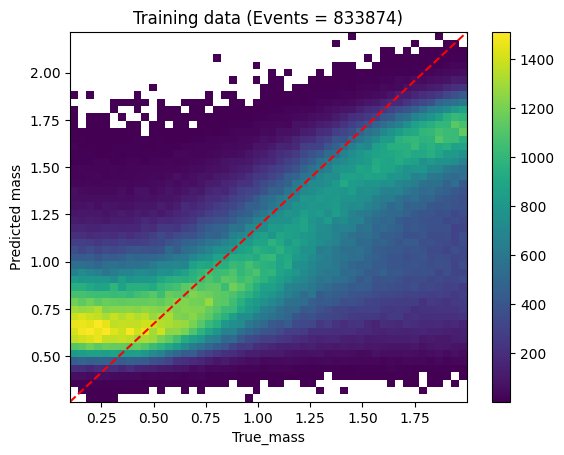

In [85]:
# Reshape into a 2D array (just for demonstration)
# data = np.array([data_pred, Data_true_list])

num_Events_train = len(train_data_true)

x = np.linspace (min(train_data_true), max(train_data_true), 100)
y = np.linspace (min(train_data_pred), max(train_data_pred), 100)

# Plot the heatmap
plt.hist2d(train_data_true,train_data_pred,bins= [50,50],cmin=1)
plt.colorbar()  # Show color scale
plt.plot(x,y, c='r', ls='--')
plt.title(f'Training data (Events = {num_Events_train})')
plt.xlabel('True_mass')
plt.ylabel('Predicted mass')
plt.show()

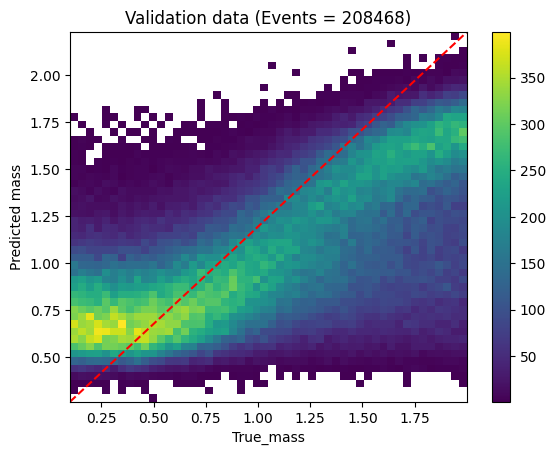

In [86]:
# Reshape into a 2D array (just for demonstration)
# data = np.array([data_pred, Data_true_list])

num_Events_valid = len(valid_data_true)

x = np.linspace (min(valid_data_true), max(valid_data_true), 100)
y = np.linspace (min(valid_data_pred), max(valid_data_pred), 100)

# Plot the heatmap
plt.hist2d(valid_data_true,valid_data_pred,bins= [50,50],cmin=1)
plt.colorbar()  # Show color scale
plt.plot(x,y, c='r', ls='--')
plt.title(f'Validation data (Events = {num_Events_valid})')
plt.xlabel('True_mass')
plt.ylabel('Predicted mass')
plt.show()